In [1]:

#%%
!pip install --upgrade pip
!pip install --upgrade ipython jupyter
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install seaborn


#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import seaborn as sns
from sklearn import metrics

# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


#%%=========
# new method
# here setting and function
# =======================================

get_ipython().run_line_magic('matplotlib', 'inline')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


print("Ok install!")

Requirement already up-to-date: pip in /srv/conda/envs/notebook/lib/python3.7/site-packages (19.1.1)
Requirement already up-to-date: ipython in /srv/conda/envs/notebook/lib/python3.7/site-packages (7.5.0)
Requirement already up-to-date: jupyter in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.0)


Ok install!


In [2]:
def line_to_column_test(all_read_parameters):

    test_data = pd.read_csv("winequality-red.csv", sep=';') 

    #X, y = test_data.iloc[:, :-1].values, test_data.iloc[:, -1].values
    #print (X, y, type(y))
    for name_p in all_read_parameters:
        test_data[name_p] = test_data.loc[:, name_p].values
    
    #df.loc[:, 'quality_cat'] = (df.loc[:, 'quality'] > 5).astype(int)
    test_data['quality_cat'] = (test_data.loc[:, 'quality'] > 5).astype(int) # buy wine or no buy
    #print (test_data['quality_cat'])

    return test_data

def line_to_column_train(all_read_parameters):

    train_data = pd.read_csv("winequality-white.csv", sep=';')

    #X, y = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
    #print (X, y, type(y))
    for name_p in all_read_parameters:
        train_data[name_p] = train_data.loc[:, name_p].values

    train_data['quality_cat'] = (train_data.loc[:, 'quality'] > 5).astype(int)

    return train_data


class DataDigest:

    def __init__(self):
        self.alco = None
        self.sugar = None
        self.dioxid = None
        self.pH = None

def get_title(name):
    if pd.isnull(name): 
        return "Null"

    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1).lower()
    else:
        return "None"


def get_index(item, index):
    if pd.isnull(item):
        return -1

    try:
        return index.get_loc(item)
    except KeyError:
        return -1


def munge_data(data, digest):
    # Age - замена пропусков на медиану в зависимости от chlorides
    data["alcohol F"] = data.apply(lambda r: digest.alco[r["chlorides"]] if pd.isnull(r["alcohol"]) else r["alcohol"], axis=1)

    # Fare - замена пропусков на медиану в зависимости от chlorides
    data["residual sugar F"] = data.apply(lambda r: digest.sugar[r["chlorides"]] if pd.isnull(r["residual sugar"]) else r["residual sugar"], axis=1)
    
    data["free sulfur dioxide F"] = data.apply(lambda r: digest.dioxid[r["chlorides"]] if pd.isnull(r["free sulfur dioxide"]) else r["free sulfur dioxide"], axis=1)
    
    #print(data.groupby("chlorides")["free sulfur dioxide"].median)
    
    data["pH F"] = data.apply(lambda r: digest.pH[r["chlorides"]] if pd.isnull(r["pH"]) else r["pH"], axis=1)
    
    #check accuracy
    #print ("data.loc['alcohol'])= ", data.loc[:, 'alcohol'])

    # для статистики
    #age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
    #data["AgeR"] = pd.cut(data["Age"].fillna(-1), bins=age_bins).astype(object)

    return data




Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_cat'], dtype='object')


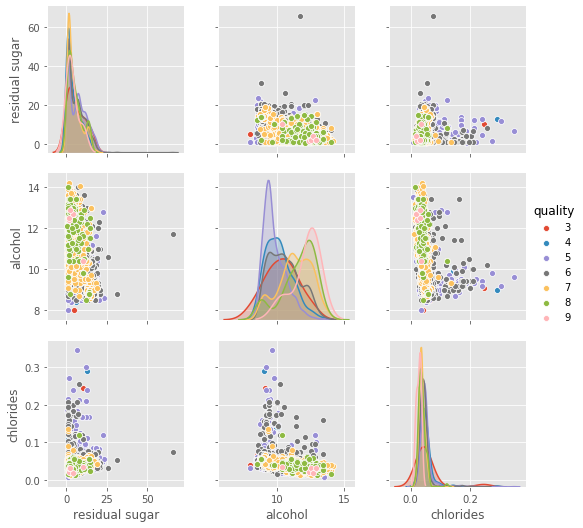

In [3]:
pd.set_option('display.width', 256)

all_parameters = [  'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                    'density', 'pH', 'sulphates', 'alcohol', 'quality'
                 ]

#train_data = pd.read_csv("winequality-white.csv")
#test_data = pd.read_csv("winequality-red.csv") 
test_data = line_to_column_test(all_parameters)
train_data = line_to_column_train(all_parameters)
all_data = pd.concat([train_data, test_data])

describe_fild = ['chlorides', 'alcohol', 'residual sugar', 'free sulfur dioxide', 'pH']
#print(train_data[describe_fild].describe())
#print(test_data[describe_fild].describe())
#all_data = line_to_column(all_data_line)

print(all_data.columns)
#3 - set mid for parameter by 'fixed acidity' or 'chlorides'
data_digest = DataDigest()
data_digest.alco = all_data.groupby(["chlorides"])["alcohol"].median()
#print(data_digest.alco)
data_digest.sugar = all_data.groupby("chlorides")["residual sugar"].median()
data_digest.dioxid = all_data.groupby("chlorides")["free sulfur dioxide"].median()
data_digest.pH = all_data.groupby("chlorides")["pH"].median()

#4
test_data_munged = munge_data(test_data, data_digest)
train_data_munged = munge_data(train_data, data_digest)
all_data_munged = pd.concat([train_data_munged, test_data_munged], sort=True)

# draw by quality (hue - differemt point) and delet missing (dropna - )
sns.pairplot(train_data_munged, vars=["residual sugar", "alcohol", "chlorides"], hue="quality", dropna=True)
plt.show()


#data_digest.alco = all_data_munged.groupby(["fixed acidity"])["alcohol F"].median()
#print(data_digest.alco)



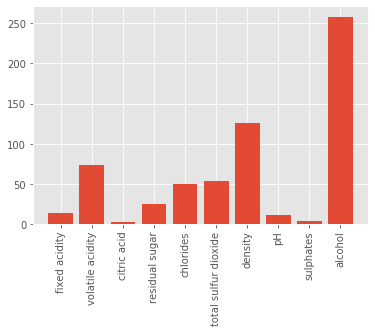

In [4]:
#5
##ndex(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
# 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_cat'], 
# dtype='object')
predictors = all_parameters
predictors.remove("quality")
predictors.remove("free sulfur dioxide") # no important
# here - select more IMPORTANT parameter
selector = SelectKBest(f_classif, k=6) # by  критерий Фишера 
selector.fit(train_data_munged[predictors], train_data_munged["quality"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()



In [5]:
#next set - MAIN parameters
predictors = [
              "alcohol F",
              "density",
              "chlorides", 
              "volatile acidity",
               'total sulfur dioxide',
                # 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                # 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                # 'density', 'pH', 'sulphates', 'alcohol'
              ]
scaler = StandardScaler()
scaler.fit(all_data_munged[predictors])

train_data_scaled = scaler.transform(train_data_munged[predictors])
#print("===========\train_data_scaled\n========\n", train_data_scaled)  
test_data_scaled = scaler.transform(test_data_munged[predictors])
#print("===========\test_data_scaled\n========\n", test_data_scaled)  


#6
#10
cv = StratifiedKFold( n_splits=3, shuffle=True, random_state=2)

#12 RandomForestClassifier

alg_frst_model = RandomForestClassifier(random_state=2) # random_state=1
alg_frst_params = [{
    "n_estimators": [ 600, 800],        # tree in forest: was 300..650
    "min_samples_split": [2],           # Минимальных выборок, для разделения внутреннего узла: was 4, 6, 8
    "min_samples_leaf": [1]             # образцы в листовом узле: was 2, 4
    #"oob_score": True                    # использовать образцы из пакета для оценки точности: 
}]
alg_frst_grid = GridSearchCV(alg_frst_model, alg_frst_params, 
                             cv=cv.split(train_data, train_data_munged["quality_cat"]), 
                             refit=True, verbose=1, n_jobs=-1) # n_jobs=-1
alg_frst_grid.fit(train_data_scaled, train_data_munged["quality_cat"])
alg_frst_best = alg_frst_grid.best_estimator_
print("Accuracy (random forest auto): {} with params {}"
      .format(alg_frst_grid.best_score_, alg_frst_grid.best_params_))

#13
# our best algoritm for predict (trained on TRAIN data)
alg_test = alg_frst_best
# fit main parameters for predict
alg_test.fit(train_data_scaled, train_data_munged["quality_cat"])
# our predict for TEST data
predictions = alg_test.predict(test_data_scaled)

#print("alg_test.predict(test_data_scaled) =  ", predictions)
#print("real =  ",  test_data['quality_cat'].T)
submission = pd.DataFrame({
    #"id": test_data["id"],
    "quality_cat": predictions,
    "must_be": test_data['quality_cat']
})
submission.to_csv("alco-submission.csv", index=True)

#check accuracy
error_rate = sum(predictions != test_data['quality_cat'])/float(test_data.shape[0])
print ("test accuracy = ", 1 - error_rate)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:   29.3s finished


Accuracy (random forest auto): 0.8170681910984076 with params {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
test accuracy =  0.6366479049405879
